<a href="https://colab.research.google.com/github/Anitagg1/Phyton-Workshop/blob/main/Wine%20Project%20II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For the  second part of the data analysis, we were provided with red and white wine sales data in order to propose pricing to the start up thaat is consulting.

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# the first step taken was to filter the types of  wines produced in the country and same area the 
# start-up wishes to establish.
# the second step was to find out how in the country of wished establishment the wines were priced
# the third step was to compare how other countries price the wines produced in the country of wishes establishment

In [ ]:
wine_sales = pd.read_csv('/content/drive/My Drive/wine_sales_data.csv')

In [ ]:
port_white = wine_sales[wine_sales.variety.isin(['Portuguese White'])]

In [ ]:
new_port_white = port_white[port_white.province.isin(['Vinho Verde','Douro','Alentejano','Tejo','Lisboa'])]

In [ ]:
q_low = new_port_white["price"].quantile(0.10)
q_hi  = new_port_white["price"].quantile(0.75)

new_port_white_filter = new_port_white[(new_port_white["price"] < q_hi) & (new_port_white["price"] > q_low)]

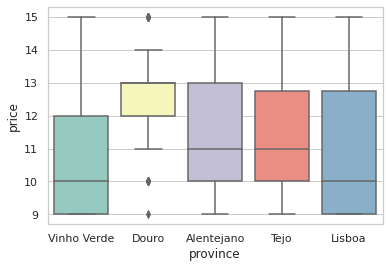

In [ ]:
bx = sns.boxplot(x="province", y="price", data=new_port_white_filter,
                 order=['Vinho Verde','Douro','Alentejano','Tejo','Lisboa'], palette="Set3")

In [ ]:
port_white['province'].value_counts(ascending=False)

Vinho Verde              240
Douro                    182
Alentejano               159
Tejo                      93
Lisboa                    65
Dão                       47
Península de Setúbal      30
Alentejo                  26
Bairrada                  23
Minho                     14
Beiras                    12
Estremadura                9
Setubal                    8
Ribatejo                   8
Terras do Sado             4
Duriense                   4
Ribatejano                 3
Beira Interior             3
Trás-os-Montes             3
Portuguese Table Wine      3
Alenteo                    2
Palmela                    1
Transmontano               1
Bucelas                    1
Name: province, dtype: int64

In [ ]:
varieties_new = wine_sales[wine_sales.variety.isin(['Chardonnay','Pinot Noir','Cabernet Sauvignon','Red Blend','Bordeaux-style Red Blend','Sauvignon Blanc','Syrah','Riesling','Merlot','Zinfandel','Sangiovese','Malbec','White Blend','Rosé','Tempranillo'])]

In [ ]:
varieties_new.variety = varieties_new.variety.astype('category')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
varieties_new.plot.bar(x='variety', rot=0);

Error in callback <function flush_figures at 0x7fa32d377320> (for post_execute):



KeyboardInterrupt



In [ ]:
char = wine_sales[wine_sales.variety == 'Chardonnay']

In [ ]:
char

In [ ]:
ries = wine_sales[wine_sales.variety == 'Riesling']

In [ ]:
ries10 = ries[ries.country.isin(['Germany','US','Austria','France','New Zealand'])]

In [ ]:
q_low = ries10["price"].quantile(0.10)
q_hi  = ries10["price"].quantile(0.75)

ries10_filtered = ries10[(ries10["price"] < q_hi) & (ries10["price"] > q_low)]

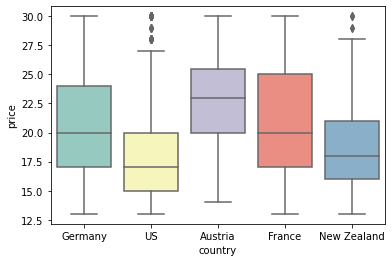

In [ ]:
bx = sns.boxplot(x="country", y="price", data=ries10_filtered,
                 order=['Germany','US','Austria','France','New Zealand'], palette="Set3")

In [ ]:
char10 = char[char.country.isin(['US','France','Chile','Australia','Italy'])]

In [ ]:
q_low = char10["price"].quantile(0.10)
q_hi  = char10["price"].quantile(0.75)

char10_filtered = char10[(char10["price"] < q_hi) & (char10["price"] > q_low)]

In [ ]:
ries10.describe()

In [ ]:
char10_filtered.describe()

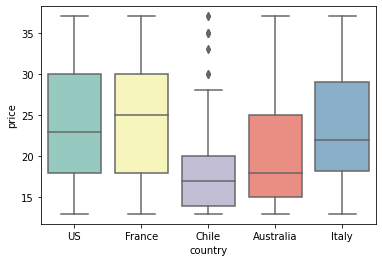

In [ ]:
ax = sns.boxplot(x="country", y="price", data=char10_filtered,
                 order=['US','France','Chile','Australia','Italy'], palette="Set3")

In [ ]:
wine_sales['country'].value_counts(ascending=False)

In [ ]:
top20varieties = wine_sales['variety'].value_counts(ascending=False).head(15)

In [ ]:
top20varieties

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Sauvignon Blanc              6320
Syrah                        5825
Riesling                     5524
Merlot                       5070
Zinfandel                    3799
Sangiovese                   3345
Malbec                       3208
White Blend                  2824
Rosé                         2817
Tempranillo                  2556
Name: variety, dtype: int64

In [ ]:
top20varieties.variety = top20varieties.variety.astype('category')

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
top20varieties = sns.load_dataset('top20varieties')
ax = sns.barplot(x="Wine Variety", data=top20varieties)

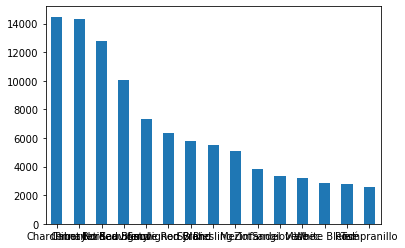

In [ ]:
top20varieties.plot.bar(x='variety', rot=0);

In [ ]:
chardonnay_wine = wine_sales[wine_sales['variety'] == 'Chardonnay']

In [ ]:
chardonnay_wine.describe()

In [ ]:

sauvignon_wine = wine_sales[wine_sales['variety'] == 'Sauvignon Blanc']

In [ ]:
sauvignon_wine.describe()

In [ ]:
riesling_wine = wine_sales[wine_sales['variety'] == 'Riesling']

In [ ]:
riesling_wine.describe()

In [ ]:
white_blend_wine = wine_sales[wine_sales['variety'] == 'White Blend']

In [ ]:
white_blend_wine.describe()

In [ ]:
top10char = chardonnay_wine['country'].value_counts(ascending=False).head(10)

In [ ]:
top10char

In [ ]:
sauvignon_wine['country'].value_counts(ascending=False)

In [ ]:
riesling_wine['country'].value_counts(ascending=False)

In [ ]:
white_blend_wine['country'].value_counts(ascending=False)

In [ ]:
import seaborn as sns
ax = sns.boxplot(x="price", y="country", data=wine_sales, palette="Set3")

In [ ]:
portugal_wine = wine_sales[wine_sales['country'] == 'Portugal'] 

In [ ]:
portugal_wine

In [ ]:
portugal_wine['variety'].value_counts(ascending=False)

Portuguese Red              2216
Portuguese White             941
Port                         924
Touriga Nacional             169
Rosé                         163
                            ... 
Azal                           1
Cabernet Sauvignon-Syrah       1
Sémillon                       1
Petite Verdot                  1
Rabigato                       1
Name: variety, Length: 78, dtype: int64

In [ ]:
white_portugal = portugal_wine[portugal_wine['variety'] == 'Portuguese White'] 

In [ ]:
white_portugal.describe()

In [ ]:
portugal_wine['province'].value_counts().sort_index(ascending=True)

In [ ]:
port_wine = portugal_wine[portugal_wine['province'] == 'Port']

In [ ]:
tejo_wine = portugal_wine[portugal_wine['province'] == 'Tejo']

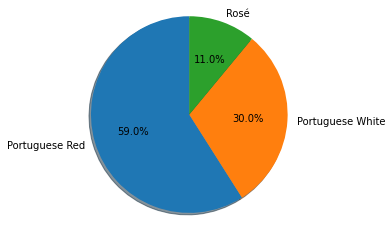

In [ ]:
labels = 'Portuguese Red', 'Portuguese White', 'Rosé'
sizes = [59, 30, 11]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
tejo_wine['variety'].value_counts(ascending=False)

Portuguese Red                         178
Portuguese White                        93
Rosé                                    33
Touriga Nacional-Cabernet Sauvignon     17
Touriga Nacional                        16
Arinto                                  14
Fernão Pires                            12
Syrah                                   10
Cabernet Sauvignon                       7
Alfrocheiro                              5
Sauvignon Blanc                          4
White Blend                              4
Viognier                                 4
Alvarinho                                3
Merlot                                   3
Alicante Bouschet                        2
Verdelho                                 2
Touriga Nacional Blend                   2
Portuguese Sparkling                     2
Trincadeira                              2
Castelão                                 1
Moscatel Graúdo                          1
Chardonnay                               1
Gewürztrami

In [ ]:
port_wine['winery'].value_counts(ascending=False)

Poças                      57
Niepoort                   53
Ramos-Pinto                47
Dow's                      40
Fonseca                    39
                           ..
Conceito Vinhos             1
Portal                      1
Porto Solene                1
Domingos Alves de Sousa     1
Quinta Dona Matilde         1
Name: winery, Length: 81, dtype: int64

In [ ]:
port_wine['variety'].value_counts(ascending=False)

Port          898
White Port      3
Red Blend       2
Name: variety, dtype: int64

In [ ]:
port_wine.describe()

,Unnamed: 0,points,price
count,903.000000,903.000000,635.000000
mean,87572.779623,88.632337,55.207874
std,43351.054338,3.019511,71.357594
min,1340.000000,80.000000,11.000000
25%,54214.500000,87.000000,22.000000
50%,90599.000000,88.000000,37.000000
75%,129571.500000,91.000000,63.500000
max,149636.000000,97.000000,980.000000


In [ ]:
new_wines = portugal_wine[portugal_wine['province'] == 'Vinho Verde'] 

In [ ]:

vinho_verde = new_wines[new_wines.variety.isin(['Portuguese White','Loureiro','Alvarinho','Rosé','Portuguese Red'])]

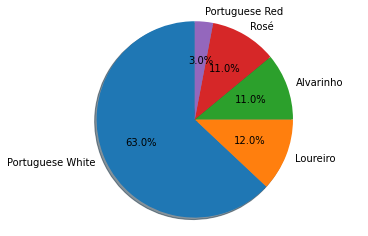

In [ ]:
labels = 'Portuguese White', 'Loureiro', 'Alvarinho', 'Rosé', 'Portuguese Red'
sizes = [63, 12, 11, 11, 3]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
new_wines.describe()

In [ ]:
new_wines['variety'].value_counts(ascending=False)

Portuguese White        240
Loureiro                 45
Alvarinho                43
Rosé                     43
Portuguese Red            9
Vinhão                    5
Avesso                    3
Arinto                    2
Portuguese Sparkling      2
Portuguese Rosé           1
Espadeiro                 1
White Blend               1
Azal                      1
Name: variety, dtype: int64

In [ ]:
new_wines['points'].value_counts().sort_index(ascending=True)


80     3
82    11
83    23
84    60
85    85
86    39
87    28
88    53
89    30
90    49
91    12
92     3
Name: points, dtype: int64

In [ ]:
new_wines['price'].value_counts().sort_index(ascending=True)

In [ ]:
new = new_wines.groupby("points").mean()

In [ ]:
new_wines

In [ ]:
new_wines['price'] = new_wines.groupby(['points'], sort=False)['price'].apply(lambda x: x.fillna(x.mean()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_wines.describe()

In [ ]:
q_low = new_wines["price"].quantile(0.25)
q_hi  = new_wines["price"].quantile(0.75)

new_wines_filtered = new_wines[(new_wines["price"] < q_hi) & (new_wines["price"] > q_low)]

In [ ]:
new_wines_filtered.describe()

,Unnamed: 0,points,price
count,182.000000,182.000000,182.000000
mean,65676.928571,86.076923,10.467440
std,43061.377031,1.936739,1.252697
min,993.000000,82.000000,8.300000
25%,29139.500000,85.000000,9.918033
50%,64466.500000,86.000000,10.000000
75%,100467.000000,88.000000,12.000000
max,143472.000000,90.000000,12.847826


In [ ]:
new_wines.isnull().sum()

In [ ]:
new_wines_filtered['points'].value_counts().sort_index(ascending=True)

In [ ]:
new_wines_filtered['price'].value_counts(bins=3).sort_index(ascending=True)

(8.294, 9.816]      45
(9.816, 11.332]     85
(11.332, 12.848]    52
Name: price, dtype: int64

In [ ]:
saublanc = wine_sales[wine_sales.variety == 'Sauvignon Blanc']

saublanc10 = saublanc[saublanc.country.isin(['US','France','Chile','Australia','Italy','Argentina','New Zealand','South Africa','Austria',"Spain"])]
saublanc10

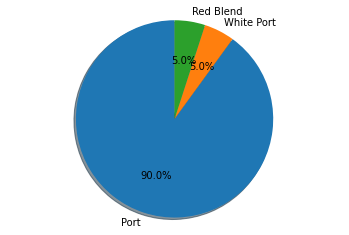

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Port', 'White Port', 'Red Blend'
sizes = [90, 5, 5]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


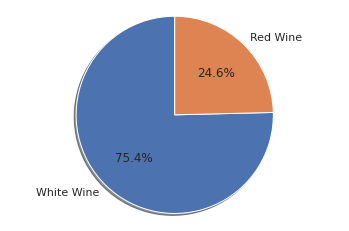

In [ ]:
labels = 'White Wine', 'Red Wine'
sizes = [4898, 1599]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
new_wines['variety'].value_counts(ascending=False)

Portuguese White        240
Loureiro                 45
Alvarinho                43
Rosé                     43
Portuguese Red            9
Vinhão                    5
Avesso                    3
Portuguese Sparkling      2
Arinto                    2
Portuguese Rosé           1
Espadeiro                 1
Azal                      1
White Blend               1
Name: variety, dtype: int64

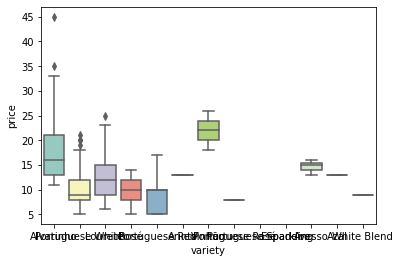

In [ ]:
import seaborn as sns
ax = sns.boxplot(x="variety", y='price', data=new_wines, palette="Set3")

In [ ]:
important_wines = new_wines[new_wines.variety.isin(['Portuguese White','Loureiro','Alvarinho','Rosé','Portuguese Red'])]


In [ ]:
white_price = new_wines[new_wines.variety.isin(['Portuguese White','Loureiro','Alvarinho'])]

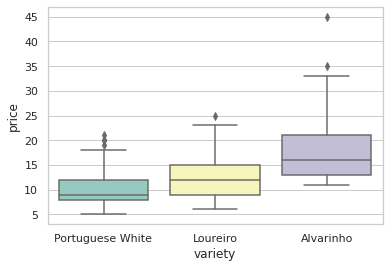

In [ ]:
ax = sns.boxplot(x="variety", y="price", data=white_price,
                 order=['Portuguese White','Loureiro','Alvarinho'], palette="Set3")

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="variety", data=important_wines)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84a6efb450>,
      dtype=object)

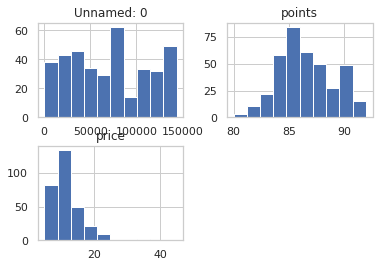

In [ ]:
important_wines.hist()

In [ ]:
port_white = new_wines[new_wines.variety.isin(['Portuguese White'])]

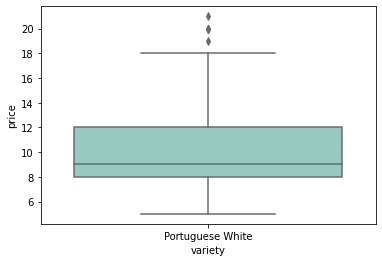

In [ ]:
ax = sns.boxplot(x="variety", y="price", data=port_white, palette="Set3")

After realizing that the most produced wines in the Country where the start-up wishes to establish is not on the list of the most produced wines world-wine and therefore they are mostly produced in the aimed country. The price analysis was restricted to the country and region and the other data would be taken as referential.

In [ ]:

portugal_wine = wine_sales[wine_sales['country'] == 'Portugal']

In [ ]:

new_wines = portugal_wine[portugal_wine['province'] == 'Vinho Verde']

In [ ]:
# using an internal quality categorization provided in the dataset with 'Points' a new groupby following the 
# categorization of the previous dataset 'high', 'medium' and 'low' was applied to the sales dataset.
new_wines['points'].value_counts().sort_index(ascending=True)

In [ ]:
new_wines['price'] = new_wines.groupby(['points'], sort=False)['price'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
q_low = new_wines["price"].quantile(0.25)
q_hi  = new_wines["price"].quantile(0.75)

new_wines_filtered = new_wines[(new_wines["price"] < q_hi) & (new_wines["price"] > q_low)]

In [ ]:
new_wines_filtered['price'].value_counts(bins=3).sort_index(ascending=True)

In [ ]:
# The latter new quality and price categorization from the sales data was applied to the previous dataset 
# containing red and white wines composition


In [ ]:
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
red_wine['wine_type'] = 'red'
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
white_wine['wine_type'] = 'white'
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

wines = pd.concat([red_wine, white_wine])

In [ ]:
wines['price'] = wines['quality_label'].apply(lambda value: '8.294, 9.816'
if value == 'low' else '9.816, 11.332'
if value == 'medium' else '11.332, 12.848')

In [ ]:
# Heatmap

import matplotlib.pyplot as plt
import seaborn as sns
corr = white_wine.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.show()